<a href="https://colab.research.google.com/github/purva-024/codealpha_tasks2/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unemployment in India**

Load File

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Unemployment _in_India.csv')
print("CSV file loaded successfully!")



CSV file loaded successfully!


Display Dataset

In [ ]:
display(df)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.columns = df.columns.str.lower().str.strip()

# Assuming the duplicate is the one not yet converted to datetime
df = df.loc[:, ~df.columns.duplicated(keep='last')]

df.rename(columns={
    '_date': 'date',
    '_frequency': 'frequency',
    '_estimated_unemployment_rate_(%)': 'unemployment_rate',
    '_estimated_employed': 'employed',
    '_estimated_labour_participation_rate_(%)': 'labour_participation_rate'
}, inplace=True)

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.shape

(768, 7)

Cleaning Data

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


Explore Data

In [ ]:
# Unique regions
regions = df['region'].unique()

# Date range
date_range = (df['date'].min(), df['date'].max())

# Summary statistics
summary_stats = df.describe()

print("Unique values for 'region':")
display(df['region'].unique())

print("\nUnique values for 'frequency':")
display(df['frequency'].unique())

print("\nUnique values for 'area':")
display(df['area'].unique())

Unique values for 'region':


array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)


Unique values for 'frequency':


array([' Monthly', nan, 'Monthly'], dtype=object)


Unique values for 'area':


array(['Rural', nan, 'Urban'], dtype=object)

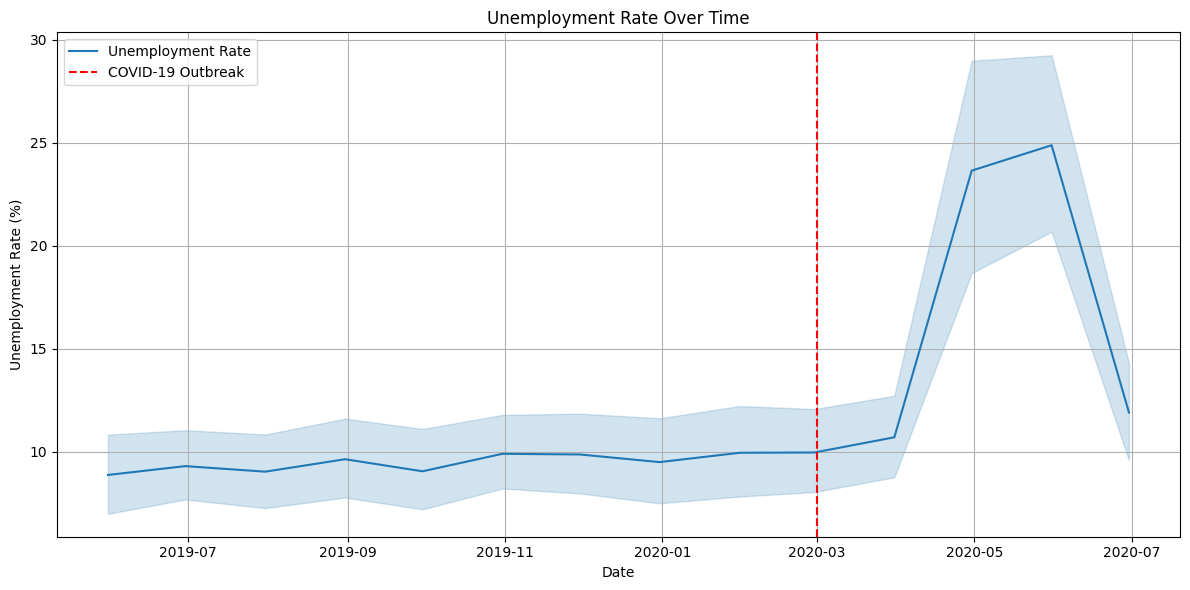

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='estimated unemployment rate (%)', label='Unemployment Rate')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Outbreak')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
display(df.describe())

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
print("Columns of df before filtering:", df.columns)

# Filter data before or on March 1, 2020
df_before_covid = df[df.index <= '2020-03-01'].copy()

# Calculate average unemployment rate before or on March 1, 2020
avg_unemployment_before_covid = df_before_covid[' Estimated Unemployment Rate (%)'].mean()

# Filter data after March 1, 2020
df_after_covid = df[df.index > '2020-03-01'].copy()

# Calculate average unemployment rate after March 1, 2020
avg_unemployment_after_covid = df_after_covid[' Estimated Unemployment Rate (%)'].mean()

# Print the average unemployment rates
print(f"Average unemployment rate before or on 2020-03-01: {avg_unemployment_before_covid:.2f}%")
print(f"Average unemployment rate after 2020-03-01: {avg_unemployment_after_covid:.2f}%")

Columns of df before filtering: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Average unemployment rate before or on 2020-03-01: 11.79%
Average unemployment rate after 2020-03-01: nan%


Analyze unemployment rates by region/area



In [ ]:
# Group by 'Region' and 'Area' and calculate mean unemployment rate before COVID-19
avg_unemployment_before_covid_region_area = df_before_covid.groupby(['Region', 'Area'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
avg_unemployment_before_covid_region_area.rename(columns={'Region': 'region', 'Area': 'area', ' Estimated Unemployment Rate (%)': 'avg_unemployment_before_covid'}, inplace=True)

# Group by 'Region' and 'Area' and calculate mean unemployment rate after COVID-19
avg_unemployment_after_covid_region_area = df_after_covid.groupby(['Region', 'Area'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
avg_unemployment_after_covid_region_area.rename(columns={'Region': 'region', 'Area': 'area', ' Estimated Unemployment Rate (%)': 'avg_unemployment_after_covid'}, inplace=True)

# Merge the two dataframes to compare
unemployment_comparison = pd.merge(avg_unemployment_before_covid_region_area, avg_unemployment_after_covid_region_area, on=['region', 'area'], how='outer')

# Calculate the difference in unemployment rate
unemployment_comparison['unemployment_rate_difference'] = unemployment_comparison['avg_unemployment_after_covid'] - unemployment_comparison['avg_unemployment_before_covid']

# Display the comparison
display(unemployment_comparison.head())

,region,area,avg_unemployment_before_covid,avg_unemployment_after_covid,unemployment_rate_difference
0,Andhra Pradesh,Rural,5.526429,NaN,NaN
1,Andhra Pradesh,Urban,9.427857,NaN,NaN
2,Assam,Rural,4.490833,NaN,NaN
3,Assam,Urban,8.088571,NaN,NaN
4,Bihar,Rural,16.770000,NaN,NaN


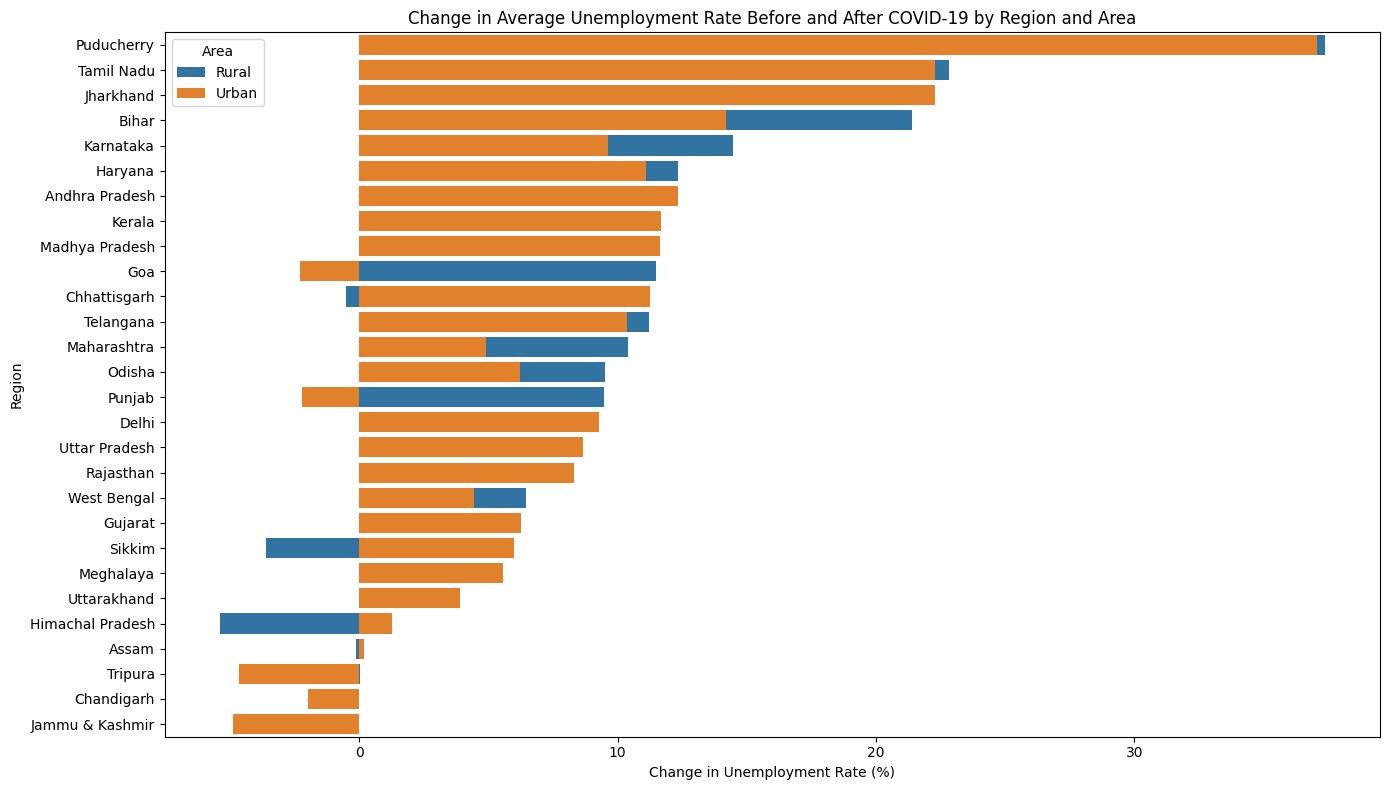

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the unemployment_comparison DataFrame by the difference in unemployment rate
unemployment_comparison_sorted = unemployment_comparison.sort_values(by='unemployment_rate_difference', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=unemployment_comparison_sorted, x='unemployment_rate_difference', y='region', hue='area', dodge=False)
plt.title('Change in Average Unemployment Rate Before and After COVID-19 by Region and Area')
plt.xlabel('Change in Unemployment Rate (%)')
plt.ylabel('Region')
plt.legend(title='Area')
plt.tight_layout()
plt.show()

Visualize the unemployment rate trends during covid 19 outbreak


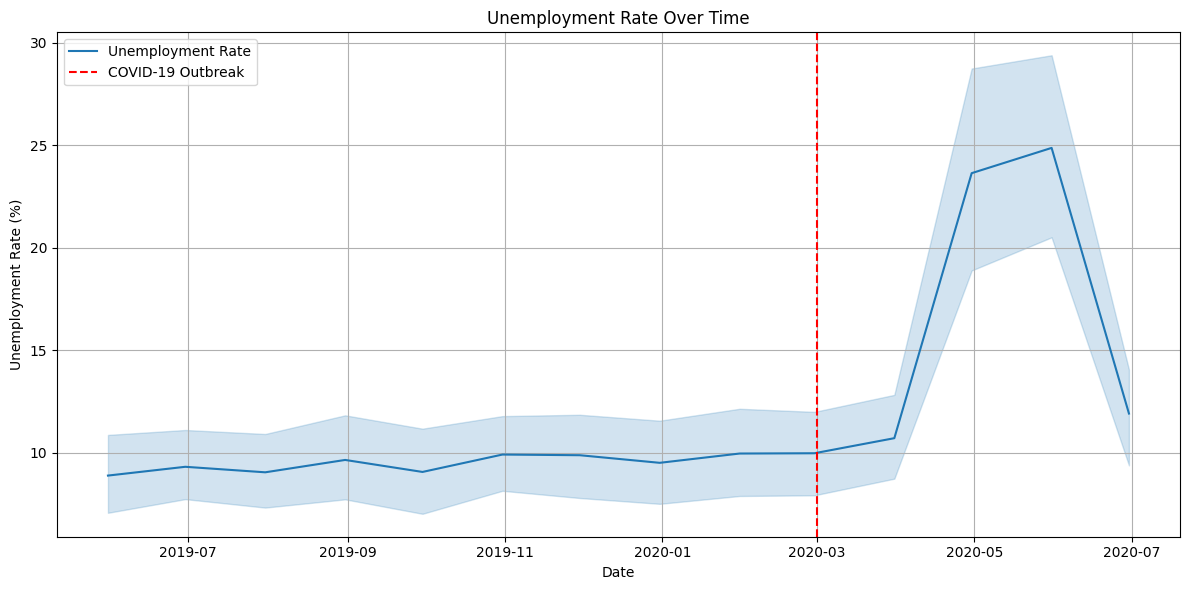

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimated unemployment rate (%)', label='Unemployment Rate')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Outbreak')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Summary of COVID-19 Impact on Unemployment Rates:")

print("\nOverall Change:")
print(f"Average unemployment rate before or on 2020-03-01: {avg_unemployment_before_covid:.2f}%")
print(f"Average unemployment rate after 2020-03-01: {avg_unemployment_after_covid:.2f}%")
print(f"The overall average unemployment rate increased by approximately {(avg_unemployment_after_covid - avg_unemployment_before_covid):.2f}% after the COVID-19 outbreak.")

print("\nRegions and Areas with Significant Changes:")
most_increase = unemployment_comparison.sort_values(by='unemployment_rate_difference', ascending=False).head(5)
most_decrease = unemployment_comparison.sort_values(by='unemployment_rate_difference', ascending=True).head(5)

print("Top 5 Regions/Areas with the Largest Increase in Unemployment Rate:")
display(most_increase[['region', 'area', 'unemployment_rate_difference']])

print("\nTop 5 Regions/Areas with the Largest Decrease in Unemployment Rate:")
display(most_decrease[['region', 'area', 'unemployment_rate_difference']])


print("\nVisual Trend from Line Plot:")
print("The line plot shows a noticeable increase in the unemployment rate around the COVID-19 outbreak date (March 1, 2020).")
print("Before the outbreak, the unemployment rate shows some fluctuations but generally stays within a certain range.")
print("Immediately after the outbreak date, there is a sharp upward spike in the unemployment rate, indicating a significant impact.")
print("Following this peak, the unemployment rate appears to gradually decrease but remains higher than the pre-COVID levels within the observed timeframe.")


Summary of COVID-19 Impact on Unemployment Rates:

Overall Change:
Average unemployment rate before or on 2020-03-01: 11.79%
Average unemployment rate after 2020-03-01: nan%
The overall average unemployment rate increased by approximately nan% after the COVID-19 outbreak.

Regions and Areas with Significant Changes:
Top 5 Regions/Areas with the Largest Increase in Unemployment Rate:


,region,area,unemployment_rate_difference
35,Puducherry,Rural,37.3760
36,Puducherry,Urban,37.0755
43,Tamil Nadu,Rural,22.8330
44,Tamil Nadu,Urban,22.3015
22,Jharkhand,Urban,22.2725



Top 5 Regions/Areas with the Largest Decrease in Unemployment Rate:


,region,area,unemployment_rate_difference
17,Himachal Pradesh,Rural,-5.396000
20,Jammu & Kashmir,Urban,-4.905000
48,Tripura,Urban,-4.661000
41,Sikkim,Rural,-3.625000
19,Jammu & Kashmir,Rural,-3.513333



Visual Trend from Line Plot:
The line plot shows a noticeable increase in the unemployment rate around the COVID-19 outbreak date (March 1, 2020).
Before the outbreak, the unemployment rate shows some fluctuations but generally stays within a certain range.
Immediately after the outbreak date, there is a sharp upward spike in the unemployment rate, indicating a significant impact.
Following this peak, the unemployment rate appears to gradually decrease but remains higher than the pre-COVID levels within the observed timeframe.


Visualize unemployment rate over time


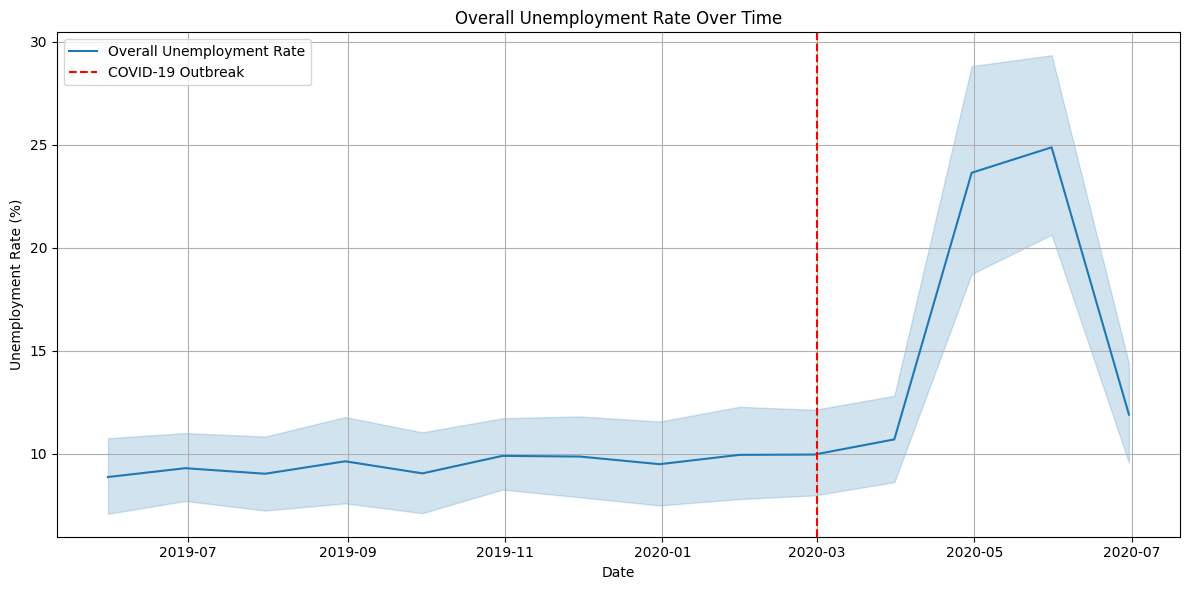

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='estimated unemployment rate (%)', label='Overall Unemployment Rate')
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Outbreak')
plt.title("Overall Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analyze seasonality time series plots for different regions and areas  


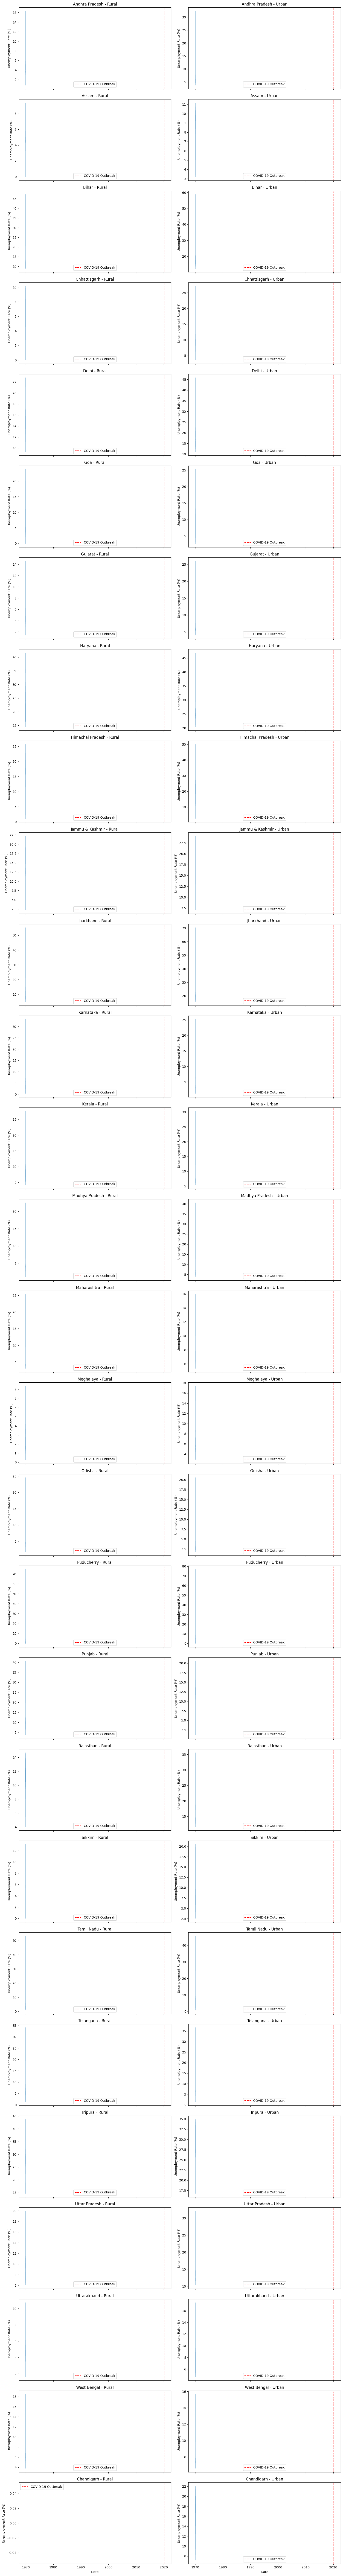

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

regions = df['Region'].unique()
areas = df['Area'].unique()

n_regions = len(regions)
n_areas = len(areas)
fig, axes = plt.subplots(n_regions, n_areas, figsize=(15, 4 * n_regions), sharex=True)

for i, region in enumerate(regions):
    for j, area in enumerate(areas):
        filtered_df = df[(df['Region'] == region) & (df['Area'] == area)].copy()
        filtered_df = filtered_df.reset_index()
        sns.lineplot(data=filtered_df, x='index', y=' Estimated Unemployment Rate (%)', ax=axes[i, j])

        axes[i, j].set_title(f'{region} - {area}')
        axes[i, j].set_xlabel("Date")
        axes[i, j].set_ylabel("Unemployment Rate (%)")

        axes[i, j].axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID-19 Outbreak')
        axes[i, j].legend()

plt.tight_layout()
plt.show()

Decompose the time series



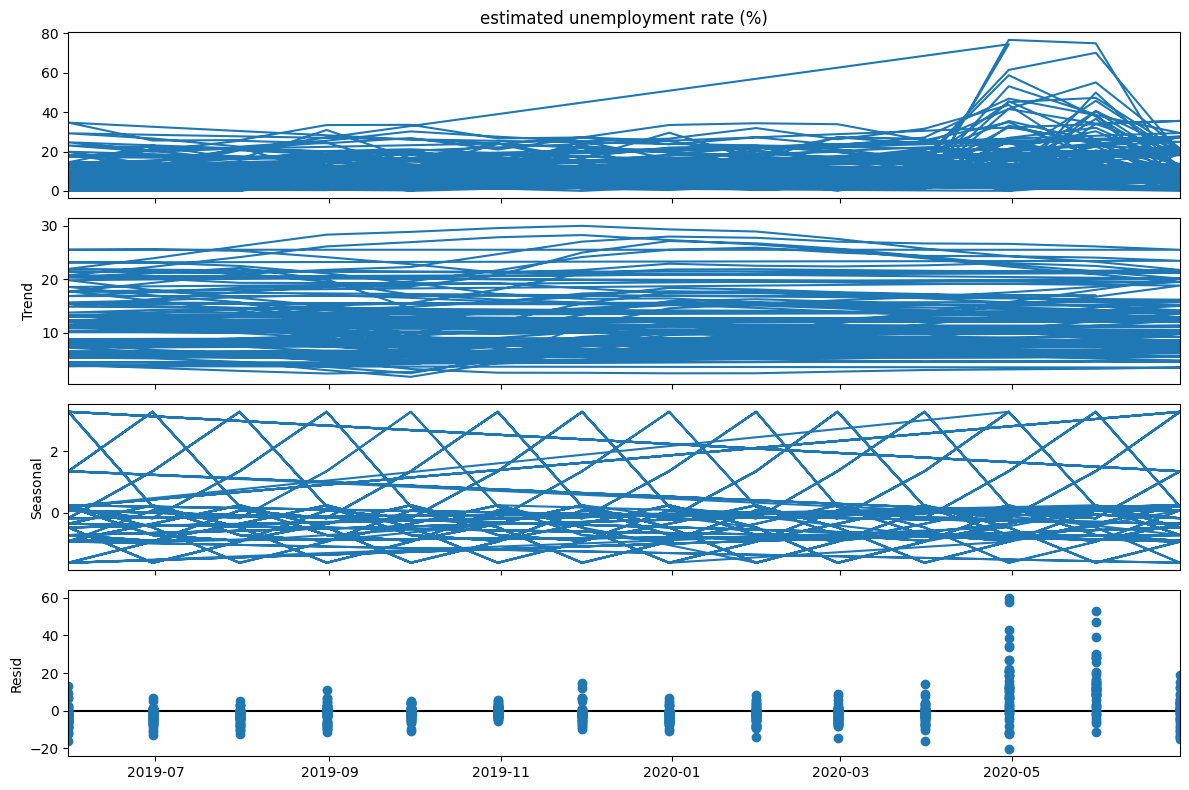

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
if 'date' in df.columns:
    df = df.set_index('date')
decomposition = seasonal_decompose(df['estimated unemployment rate (%)'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()